# MOwNiT 
## Laboratorium 5

### Tablice wielowymiarowe i mnożenie macierzy w Julii

In [1]:
# tablice wielowymiarowe w Julii
Asmall = [[1.0 4.0]; [0.0 1.0]]
Bsmall = Asmall
# size(B,1)

2×2 Matrix{Float64}:
 1.0  4.0
 0.0  1.0

#### Wersja naiwna

In [2]:
# mnożenie macierzy - wersja naiwna
function naive_multiplication(A,B)
    C = zeros(Float64, size(A,1), size(B,2))
    for i=1:size(A,1)
        for j=1:size(B,2)
            for k=1:size(A,2)
                C[i,j] = C[i,j] + A[i,k]*B[k,j]
            end
        end
    end
    C
end

naive_multiplication (generic function with 1 method)

In [3]:
#kompilacja
naive_multiplication(Asmall, Bsmall)

2×2 Matrix{Float64}:
 1.0  8.0
 0.0  1.0

In [4]:
#kompilacja
@elapsed naive_multiplication(Asmall, Bsmall)

5.1e-6

#### Wersja ulepszona

In [5]:
# Należy pamiętać o "column-major" dostępie do tablic - 
# pierwszy indeks zmienia się szybciej
# tak jak Matlab, R, Fortran 
# inaczej niz C, Python
A1 = [[1 2]; [3 4]]
display(A1)
vec(A1)

2×2 Matrix{Int64}:
 1  2
 3  4

4-element Vector{Int64}:
 1
 3
 2
 4

In [6]:
# poprawiona funkcja korzytająca z powyższego oraz z faktu, że
# można zmieniać kolejność operacji dodawania (a co za tym idzie kolejnosc petli).
function better_multiplication(A, B)
    C = zeros(Float64, size(A,1), size(B,2))
    for j=1:size(B,2)
        for k=1:size(A,2)
            for i=1:size(A,1)
                C[i,j] = C[i,j] + A[i,k]*B[k,j]
            end
        end
    end
    C
end

better_multiplication (generic function with 1 method)

In [7]:
@elapsed better_multiplication(Asmall, Bsmall)

0.0497366

#### Wersja BLASowa

In [8]:
#kompilacja funkcji BLASowej do mnożenia macierzy
#https://docs.julialang.org/en/stable/stdlib/linalg/#BLAS-Functions-1
Asmall*Bsmall

2×2 Matrix{Float64}:
 1.0  8.0
 0.0  1.0

#### Porównanie wersji

In [9]:
A = rand(1000, 1000);
B = rand(1000, 1000);

In [10]:
@elapsed naive_multiplication(A, B)

2.6402653

In [11]:
@elapsed better_multiplication(A, B)

1.0432436

In [12]:
@elapsed A*B

0.018152

### Wielomiany i aproksymacja średniokwadratowa

In [13]:
# pakiet Polynomials jest mozliwy do instalacji pod Juliabox
# https://github.com/JuliaMath/Polynomials.jl
# using Pkg
# Pkg.add("Polynomials")

In [14]:
# Przykładowa funkcja, którą będziemy aproksymować
myfun = exp

exp (generic function with 13 methods)

In [15]:
#import Pkg; 
#Pkg.add("Polynomials")

In [16]:
# aproksymacja sredniokwadratowa wielomianem - tutaj przyklad dla wielomianu 3 stopnia
using Polynomials
# tworzę punkty do aproksymacji (tutaj jako przykład wyliczone wartości funkcji e^x)
xs = 0:10
ys = map(myfun, xs)

# dopasowuje wielomian trzeciego stopnia do danych
fit_poly_3 = fit(xs, ys, 3)

Polynomial(-1086.8658708490402 + 2905.5721994684973*x - 1082.7457238744728*x^2 + 100.44658880845468*x^3)

In [17]:
typeof(fit_poly_3)

Polynomial{Float64, :x} (alias for Polynomials.MutableDensePolynomial{Polynomials.StandardBasis, Float64, :x})

In [18]:
# obliczanie wartosci wielomianu 
fit_poly_3(1)

836.4071935534389

In [19]:
using Plots

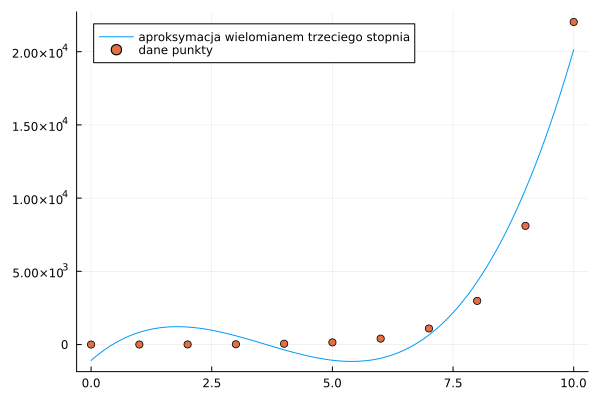

In [20]:
plot(fit_poly_3,  extrema(xs)..., label="aproksymacja wielomianem trzeciego stopnia")
# ! -dodanie do tego samego wykresu punktów wg ktorych aproksymowalismy
scatter!(xs, ys, label ="dane punkty")

### Wielomiany Czebyszewa w pakiecie Polynomials

In [21]:
# podajemy tablicę współczynników, gdzie wielomiany Czebyszewa są wielomianami bazowymi np dla T2(x)
t2 = ChebyshevT([0, 0, 1])

ChebyshevT(1⋅T_2(x))

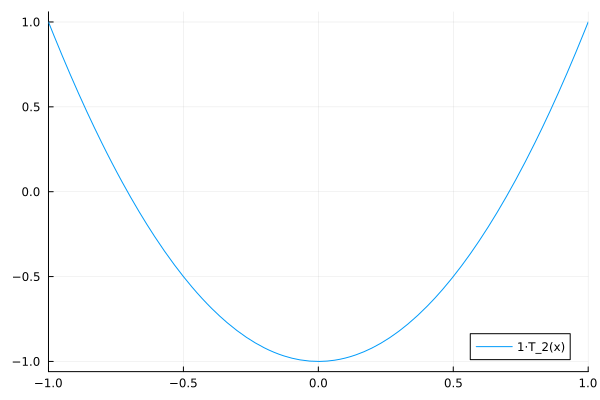

In [22]:
plot(t2)

In [23]:
#zera wielomianu Czebyszewa T2
Polynomials.roots(t2)

2-element Vector{Float64}:
 -0.7071067811865475
  0.7071067811865476

In [24]:
# konwersja na wielomian
convert(Polynomial, t2)

Polynomial(-1.0 + 2.0*x^2)

In [25]:
# można tworzyć kombinacje liniowe w bazie wielomianów Czebyszewa
kombinacja_T = ChebyshevT([3,2,1])

ChebyshevT(3⋅T_0(x) + 2⋅T_1(x) + 1⋅T_2(x))

In [26]:
convert(Polynomial, kombinacja_T)

Polynomial(2.0 + 2.0*x + 2.0*x^2)

Skąd się wzieło polynomials logo :-)
https://juliamath.github.io/Polynomials.jl/stable/reference/#Example:-The-Polynomials.jl-logo-1

## Aproksymacja jednostajna Taylora i Pade

In [ ]:
#using Pkg;
#Pkg.add("TaylorSeries")

In [ ]:
using TaylorSeries

In [ ]:
# Definiujemy, ile pierwszych wyrazów szeregu Taylora nas interesuje
t = Taylor1(Float64, 5)

 1.0 t + 𝒪(t⁶)

In [ ]:
#Rozwinięcie Taylora 
myfun_taylor = myfun(t)

 1.0 + 1.0 t + 0.5 t² + 0.16666666666666666 t³ + 0.041666666666666664 t⁴ + 0.008333333333333333 t⁵ + 𝒪(t⁶)

In [ ]:
# Julia hint - jak zapytać o pola typu danych
fieldnames(typeof(myfun_taylor))

(:coeffs, :order)

In [ ]:
# mogę wyciągnąć ze struktury typu  odpowiednie pole
myfun_taylor.coeffs

6-element Vector{Float64}:
 1.0
 1.0
 0.5
 0.16666666666666666
 0.041666666666666664
 0.008333333333333333

In [ ]:
# Z przybliżenia Taylora tworzę wielomian zrozumiały dla pakietu Polynomials (typ Polynomial)
myfun_t_pol = Polynomial(myfun_taylor.coeffs)

Polynomial(1.0 + 1.0*x + 0.5*x^2 + 0.16666666666666666*x^3 + 0.041666666666666664*x^4 + 0.008333333333333333*x^5)

In [ ]:
# mogę zamienić przybliżenie Taylora na aproksymację Pade (np. dla n=2, m=2)
myfun_pade = Polynomials.PolyCompat.PadeApproximation.Pade(myfun_t_pol, 2, 2)

Polynomials.PolyCompat.PadeApproximation.Pade{Float64, Float64}(Polynomial(1.0 + 0.5*x + 0.08333333333333333*x^2), Polynomial(1.0 - 0.5*x + 0.08333333333333333*x^2), :x)

### Zadania
 
1. Uruchomić 
   - `naive_multiplication(A,B)`, 
   - `better_multiplication(A,B)` 
   - mnożenie BLAS w Julii (`A*B`) 

    dla coraz większych macierzy kwadratowych i zmierzyć czasy. Narysować wykres zależyności czasu od rozmiaru macierzy wraz z słupkami błędów. Wszystkie trzy metody powinny być na jednym wykresie. **(1pkt)**. Do analizy danych można użyć wybranego narzędzia (Julia, R)
 
 
2. Napisać w języku C:
   - naiwną metodę mnożenia macierzy kwadratowych (wersja 1) 
   - ulepszoną wersję za pomocą zamiany pętli metodę mnożenia macierzy(wersja 2), pamiętając, że w C macierz przechowywana jest wierszami (row major order tzn A11,A12, ..., A1m, A21, A22,...,A2m, ..Anm), inaczej niż w Julii ! 
   - skorzystać z  możliwości BLAS poziom 3 dostępnego w GSL  (przykład uzycia https://www.gnu.org/software/gsl/doc/html/blas.html#examples )
    
    Należy porównywać działanie tych trzech algorytmow bez włączonej opcji optymalizacji kompilatora. Przedstawić wyniki na jednym wykresie tak jak w p.1. (osobno niż p.1). **(1 pkt)**
    
    *(Dla chętnych)* sprawdzić, co się dzieje, jak włączymy optymalizację kompilatora i dodać do wykresu. 
Do analizy danych można użyć wybranego narzędzia (Julia, R)

3.  Użyć aproksymacji odpowiednimi wielomianami, które najlepiej pasują do zależności czasowych każdego z algorytmów. Stopień wielomianu powinien zgadzać się z teoretyczną złożonoscią. Dodać wykresy uzyskanych wielomianów do wcześniejszych wykresów. **(1 pkt)** Do analizy danych można użyć wybranego narzędzia (Julia, R)

4. Pokazać zniwelowanie efektu Rungego  poprzez użycie wsparcia dla wielomianów Czebyszewa w pakiecie Polynomials. Wymagany wykres. **(1 pkt)**

5. Przybliżenie Pade jest często lepsze niż rozwinięcie w szereg Taylora przy aproksymowaniu funkcji, które posiadają osobliwości. Korzystając ze wsparcia dla aproksymacji Pade w pakiecie Polynomials pokazać dowolny przykład (wraz z wykresem), gdzie takie przybliżenie faktycznie jest lepsze. Można odtworzyć wykres z wykładu albo zainspirować się przykładowym artykułem https://www.hindawi.com/journals/ijcm/2014/587430/ **(1 pkt)**


In [ ]:
using LinearAlgebra
using Statistics
using BenchmarkTools
using Plots

# Naiwna metoda mnożenia macierzy O(n^3)
function naive_multiplication(A,B)
    C = zeros(Float64, size(A,1), size(B,2))
    for i=1:size(A,1)
        for j=1:size(B,2)
            for k=1:size(A,2)
                C[i,j] = C[i,j] + A[i,k]*B[k,j]
            end
        end
    end
    C
end

# Lepsza metoda – np. z zamienioną kolejnością pętli (lepsza lokalność danych)
function better_multiplication(A, B)
    C = zeros(Float64, size(A,1), size(B,2))
    for j=1:size(B,2)
        for k=1:size(A,2)
            for i=1:size(A,1)
                C[i,j] = C[i,j] + A[i,k]*B[k,j]
            end
        end
    end
    C
end

# Testowane rozmiary macierzy
sizes = 50:50:500

# Liczba powtórzeń dla statystyk
repeats = 5

# Przechowywanie wyników
times_naive = Float64[]
times_better = Float64[]
times_blas = Float64[]

errors_naive = Float64[]
errors_better = Float64[]
errors_blas = Float64[]

for n in sizes
    A = randn(n, n)
    B = randn(n, n)

    # Naiwne
    t_naive = [@elapsed naive_multiplication(A, B) for _ in 1:repeats]
    push!(times_naive, mean(t_naive))
    push!(errors_naive, std(t_naive))

    # Lepsze
    t_better = [@elapsed better_multiplication(A, B) for _ in 1:repeats]
    push!(times_better, mean(t_better))
    push!(errors_better, std(t_better))

    # BLAS
    t_blas = [@elapsed A * B for _ in 1:repeats]
    push!(times_blas, mean(t_blas))
    push!(errors_blas, std(t_blas))
end

# Rysowanie wykresu
plot(sizes, times_naive, yerror=errors_naive, label="Naive", lw=2, marker=:circle)
plot!(sizes, times_better, yerror=errors_better, label="Better", lw=2, marker=:square)
plot!(sizes, times_blas, yerror=errors_blas, label="BLAS (A*B)", lw=2, marker=:diamond)
xlabel!("Matrix size (n x n)")
ylabel!("Time (s)")
title!("Matrix Multiplication Time vs Size")
savefig("matrix_multiplication.png")

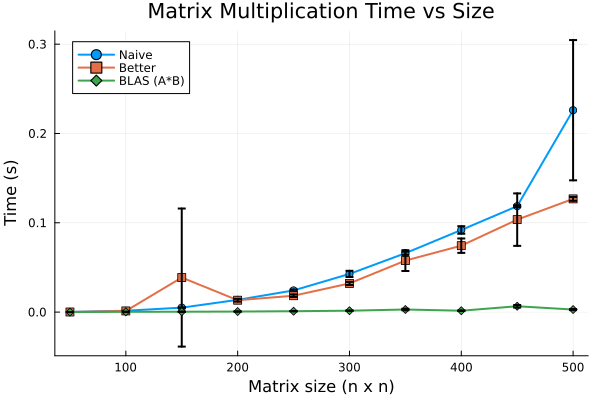

In [ ]:
#include <stdio.h>
#include <stdlib.h>
#include <time.h>
#include <gsl/gsl_blas.h>

// Alokacja macierzy
double* allocate_matrix(int n) {
    return (double*)calloc(n * n, sizeof(double));
}

// Inicjalizacja losowymi wartościami
void fill_matrix(double* A, int n) {
    for (int i = 0; i < n * n; i++) {
        A[i] = (double)rand() / RAND_MAX;
    }
}

// Naiwne mnożenie macierzy
void naive_multiplication(double* A, double* B, double* C, int n) {
    for (int i = 0; i < n; i++)
        for (int j = 0; j < n; j++)
            for (int k = 0; k < n; k++)
                C[i * n + j] += A[i * n + k] * B[k * n + j];
}

// Ulepszona wersja (zamieniona kolejność pętli)
void better_multiplication(double* A, double* B, double* C, int n) {
    for (int i = 0; i < n; i++)
        for (int k = 0; k < n; k++)
            for (int j = 0; j < n; j++)
                C[i * n + j] += A[i * n + k] * B[k * n + j];
}

// GSL BLAS dgemm
void blas_multiplication(double* A, double* B, double* C, int n) {
    gsl_matrix_view mA = gsl_matrix_view_array(A, n, n);
    gsl_matrix_view mB = gsl_matrix_view_array(B, n, n);
    gsl_matrix_view mC = gsl_matrix_view_array(C, n, n);

    gsl_blas_dgemm(CblasNoTrans, CblasNoTrans, 1.0,
                   &mA.matrix, &mB.matrix, 0.0, &mC.matrix);
}

// Pomiar czasu w sekundach
double get_time_diff(clock_t start, clock_t end) {
    return (double)(end - start) / CLOCKS_PER_SEC;
}

// Główna funkcja testująca
int main() {
    FILE* file = fopen("results_c.csv", "w");
    fprintf(file, "size,naive,better,blas\n");

    srand(time(NULL));

    for (int n = 100; n <= 1000; n += 100) {
        double *A = allocate_matrix(n);
        double *B = allocate_matrix(n);
        double *C = allocate_matrix(n);

        fill_matrix(A, n);
        fill_matrix(B, n);

        // Naive
        clock_t start = clock();
        naive_multiplication(A, B, C, n);
        clock_t end = clock();
        double t_naive = get_time_diff(start, end);

        // Reset C
        for (int i = 0; i < n * n; i++) C[i] = 0;

        // Better
        start = clock();
        better_multiplication(A, B, C, n);
        end = clock();
        double t_better = get_time_diff(start, end);

        // Reset C
        for (int i = 0; i < n * n; i++) C[i] = 0;

        // BLAS
        start = clock();
        blas_multiplication(A, B, C, n);
        end = clock();
        double t_blas = get_time_diff(start, end);

        // Zapisz
        fprintf(file, "%d,%.6f,%.6f,%.6f\n", n, t_naive, t_better, t_blas);

        free(A); free(B); free(C);
    }

    fclose(file);
    return 0;
}


In [ ]:
using CSV, DataFrames, Plots

# Wczytanie danych z plików CSV
df_c_no_opt = CSV.read("results_c_no_opt.csv", DataFrame)
df_c_opt = CSV.read("results_c_opt.csv", DataFrame)
df_c_fastopt = CSV.read("results_c_fastopt.csv", DataFrame)


# Utworzenie wykresu z wszystkimi 6 implementacjami
p = plot(
    df_c_no_opt.size, df_c_no_opt.naive, 
    label="Naive (C - no opt)", marker=:circle, lw=2, ls=:solid
)
plot!(
    df_c_no_opt.size, df_c_no_opt.better, 
    label="Better (C - no opt)", marker=:square, lw=2, ls=:solid
)
plot!(
    df_c_no_opt.size, df_c_no_opt.blas, 
    label="BLAS (C - no opt)", marker=:diamond, lw=2, ls=:solid
)
plot!(
    df_c_opt.size, df_c_opt.naive, 
    label="Naive (C - O2)", marker=:circle, lw=2, ls=:dash
)
plot!(
    df_c_opt.size, df_c_opt.better, 
    label="Better (C - O2)", marker=:square, lw=2, ls=:dash
)
plot!(
    df_c_opt.size, df_c_opt.blas, 
    label="BLAS (C - O2)", marker=:diamond, lw=2, ls=:dash
)
plot!(
    df_c_fastopt.size, df_c_fastopt.naive, 
    label="Naive (C - Ofast)", marker=:circle, lw=2, ls=:dot
)
plot!(
    df_c_fastopt.size, df_c_fastopt.better, 
    label="Better (C - Ofast)", marker=:square, lw=2, ls=:dot
)
plot!(
    df_c_fastopt.size, df_c_fastopt.blas, 
    label="BLAS (C - Ofast)", marker=:diamond, lw=2, ls=:dot
)

# Dodanie etykiet i tytułu
xlabel!("Rozmiar macierzy (n × n)")
ylabel!("Czas (s)")
title!("Porównanie czasów mnożenia macierzy")

# Zapisanie wykresu
savefig("matrix_multiplication_comparison.png")
display(p)  # Wyświetlenie wykresu




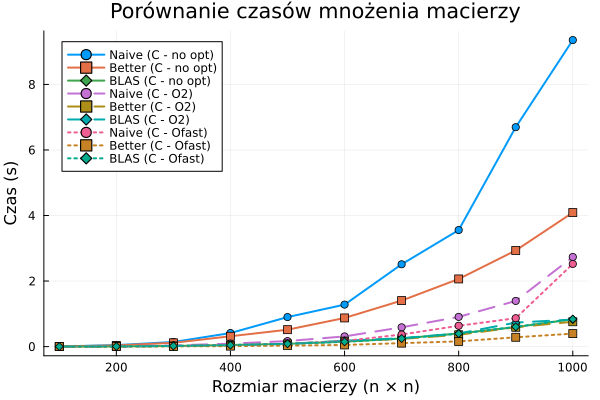

In [ ]:
using CSV, DataFrames, Plots, Polynomials

# Wczytanie danych
df = CSV.read("results_c_opt.csv", DataFrame)
n = df.size
x = Float64.(n)

# Dopasuj wielomiany
fit_naive = fit(x, df.naive, 3)
fit_better = fit(x, df.better, 3)
fit_blas = fit(x, df.blas, 2)  # teoretycznie powinno być 2.5

# Wartości dopasowania
y_naive_fit = fit_naive.(x)
y_better_fit = fit_better.(x)
y_blas_fit = fit_blas.(x)

# Rysowanie
plot(x, df.naive, label="Naive", marker=:circle, lw=2)
plot!(x, y_naive_fit, label="Naive (fit)", ls=:dash, lw=2)

plot!(x, df.better, label="Better", marker=:square, lw=2)
plot!(x, y_better_fit, label="Better (fit)", ls=:dash, lw=2)

plot!(x, df.blas, label="BLAS", marker=:diamond, lw=2)
plot!(x, y_blas_fit, label="BLAS (fit)", ls=:dash, lw=2)

xlabel!("Matrix size (n x n)")
ylabel!("Time (s)")
title!("Matrix Multiplication in C with Polynomial Fit")

# Zapisz wykres
savefig("c_multiplication_fit.png")

println("Naive fit:   ", fit_naive)
println("Better fit:  ", fit_better)
println("BLAS fit:    ", fit_blas)



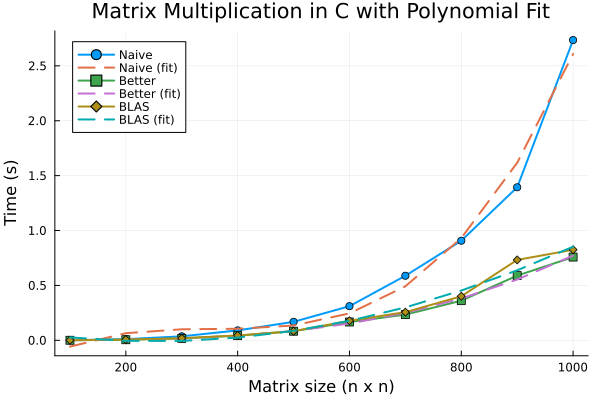

In [ ]:
using CSV, DataFrames, Plots, Polynomials, LinearAlgebra
using Polynomials: ChebyshevT

df = CSV.read("results_c_opt.csv", DataFrame)
x = Float64.(df.size)
y = df.naive

# Normalizacja do [-1, 1]
function normalize_to_chebyshev(x)
    xmin, xmax = extrema(x)
    return 2 * (x .- xmin) / (xmax - xmin) .- 1
end

x_cheb = normalize_to_chebyshev(x)

# Dopasowanie: wielomian Czebyszewa 5. stopnia
# Create Chebyshev basis polynomials using current API
basis = [ChebyshevT([zeros(k)..., 1.0]) for k in 0:10]
V = hcat([p.(x_cheb) for p in basis]...)
coeffs = V \ y
poly_cheb = sum(coeffs[i] * basis[i] for i in 1:length(basis))
y_fit_cheb = poly_cheb.(x_cheb)

# Dla porównania: zwykłe dopasowanie
poly_normal = fit(x, y, 10)
y_fit_normal = poly_normal.(x)

# Wykres
plot(x, y, label="Dane (naive)", marker=:circle)
plot!(x, y_fit_normal, label="Zwykły wielomian", lw=2, ls=:dash)
plot!(x, y_fit_cheb, label="Czebyszew", lw=2, ls=:dot)
xlabel!("Rozmiar macierzy (n)")
ylabel!("Czas (s)")
title!("Zniwelowanie efektu Rungego - Czebyszew vs zwykły wielomian")
savefig("runge_chebyshev_fixed.png")



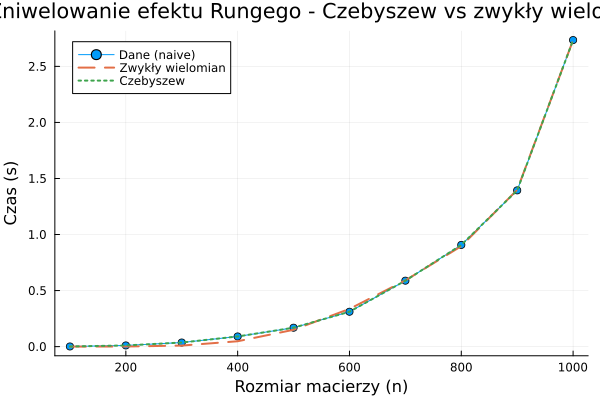

In [ ]:
using Plots
using Polynomials

# FUNKCJE

# Definicja funkcji dokładnej: f(z) = log(1+z)/z
f(z) = log(1 + z) / z

# Obliczenie współczynników szeregu Taylora f(z) do rzędu 4.
# Log(1+z) = z - z^2/2 + z^3/3 - z^4/4 + z^5/5 - ...,
# więc f(z) = log(1+z)/z = 1 - z/2 + z^2/3 - z^3/4 + z^4/5 - ...
a0 = 1.0
a1 = -1/2
a2 = 1/3
a3 = -1/4
a4 = 1/5

# Wielomian Taylora rzędu 4
P_taylor = Polynomial([a0, a1, a2, a3, a4])
println("Rozwinięcie Taylora (współczynniki):")
println(coeffs(P_taylor))  # wypisze współczynniki od stałej

# KONSTRUKCJA APROKSYMACJI PADÉ [2|2]
# Przyjmujemy postać:
#   f_pade(z) = (p0 + p1 z + p2 z^2) / (1 + q1 z + q2 z^2)
#
# Warunki dopasowania (rozszerzamy w szereg do z^4):
# 1) Dla z^0:    a0 - p0 = 0     =>  p0 = a0 = 1
# 2) Dla z^1:    a1 + q1 a0 - p1 = 0  =>  p1 = a1 + q1
# 3) Dla z^2:    a2 + q1 a1 + q2 a0 - p2 = 0  => p2 = a2 + q1 a1 + q2
# 4) Dla z^3:    a3 + q1 a2 + q2 a1 = 0
# 5) Dla z^4:    a4 + q1 a3 + q2 a2 = 0
#
# Rozwiążemy najpierw równania dla q1 i q2 (warunki dla z^3 i z^4)
#
# (4) a3 + q1 a2 + q2 a1 = 0   =>  -1/4 + q1*(1/3) + q2*(-1/2) = 0
# (5) a4 + q1 a3 + q2 a2 = 0   =>   1/5 + q1*(-1/4) + q2*(1/3) = 0
#
# Mnożymy (4) przez 12:  12*(-1/4) + 12*(q1/3) + 12*(-q2/2) =  -3 + 4q1 - 6q2 = 0
#   => 4q1 - 6q2 = 3
#
# Mnożymy (5) przez 12:  12*(1/5) + 12*(-q1/4) + 12*(q2/3) = 12/5 - 3q1 + 4q2 = 0
#   => -3q1 + 4q2 = -12/5
#
# Rozwiązując:
#   4q1 - 6q2 = 3   =>  q1 = (3 + 6q2) / 4.
# Podstawiamy do drugiego równania:
#   -3*((3+6q2)/4) + 4q2 = -12/5  =>  - (9 + 18q2)/4 + 4q2 = -12/5.
# Mnożymy przez 4:
#   -9 - 18q2 + 16q2 = -48/5  =>  -9 - 2q2 = -48/5  =>  -2q2 = -48/5 + 9.
# Obliczamy: 9 = 45/5, więc:
#   -2q2 = (-48 + 45)/5 = -3/5   =>  q2 = (3/5)/2 = 3/10.
#
# Następnie: q1 = (3 + 6*(3/10)) / 4 = (3 + 18/10) / 4 = (3 + 1.8) / 4 = 4.8/4 = 1.2 = 6/5.
#
q1 = 6/5      # 1.2
q2 = 3/10     # 0.3
#
# Teraz wyznaczamy p1 i p2:
p0 = a0  # = 1.0
p1 = a1 + q1  # = -0.5 + 1.2 = 0.7  czyli 7/10
p2 = a2 + q1*a1 + q2   # = 1/3 + (6/5)*(-1/2) + 3/10
# Obliczamy: 1/3 ≈ 0.3333, (6/5)*(-1/2) = -6/10 = -0.6, 3/10 = 0.3, więc p2 = 0.3333 - 0.6 + 0.3 = 0.03333 ≈ 1/30.
#
println("Współczynniki Padé:")
println("q1 = $q1, q2 = $q2")
println("p0 = $p0, p1 = $p1, p2 = $p2")

# Definicja funkcji aproksymującej Padé
f_pade(z) = (p0 + p1*z + p2*z^2) / (1 + q1*z + q2*z^2)

# WIZUALIZACJA

# Wybieramy zakres zmiennej z. Uważamy, że osobliwość przy z = -1 jest blisko, więc zaczynamy od -0.9.
z_vals = -0.9:0.01:10.0

# Tworzymy wykres, porównując:
# • funkcję dokładną,
# • rozwinięcie Taylora (w postaci wielomianu),
# • aproksymację Padé.
plt = plot(z_vals, f.(z_vals), label="Funkcja dokładna f(z)", lw=2)
plot!(plt, z_vals, P_taylor.(z_vals), label="Rozwinięcie Taylora (rząd 4)", lw=2, linestyle=:dash)
plot!(plt, z_vals, f_pade.(z_vals), label="Aproksymacja Padé [2|2]", lw=2, linestyle=:dot)
xlabel!("z")
ylabel!("f(z)")
title!("Porównanie rozwinięcia Taylora i aproksymacji Padé dla f(z)=log(1+z)/z")

savefig(plt, "pade_taylor.png")


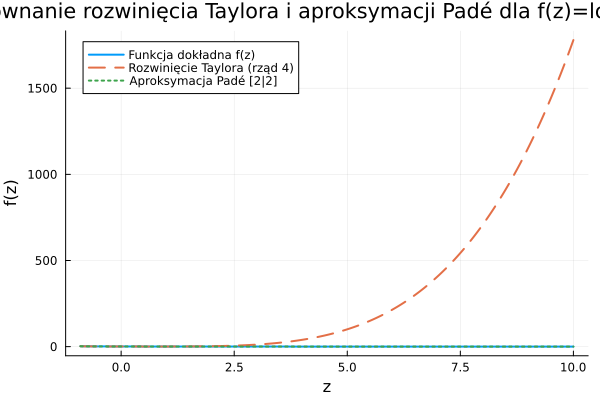